In [1]:
using Pkg
Pkg.add("WebIO")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
using WebIO
using IJulia
include("GA.jl")
include("plottingUtils.jl")
include("roadNetwork.jl")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-6225834189877682909\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-16782828009390333811\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-6225834189877682909\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Warning: Error requiring IJulia from Plots:
│ MethodError: no method matching joinpath(::Nothing)
│ Closest candidates are:
│   joinpath(!Matched::AbstractString) at path.jl:244
│   joinpath(!Matched::AbstractString, !Matched::AbstractString...) at path.jl:289
│ Stacktrace:
│  [1] _init_ijulia_plotting() at /home/sam/.julia/packages/Plots/jIs2V/src/ijulia.jl:7
│  [2] top-level scope at /home/sam/.julia/packages/Plots/jIs2V/src/init.jl:75
│  [3] eval at ./boot.jl:331 [inlined]
│  [4] eval at /home/sam/.julia/packages/Plots/jIs2V/src/Plots.jl:1 [inlined]
│  [5] (::Plots.var"#277#310")() at /home/sam/.julia/packages/Requires/vyVBT/src/require.jl:97
│  [6] err(::Any, ::Module, ::String) at /home/sam/.julia/packages/Requires/vyVBT/src/require.jl:42
│  [7] (::Plots.var"#276#309")() at /home/sam/.julia/packages/Requires/vyVBT/src/require.jl:96
│  [8] withpath(::Any, ::String) at /home/sam/.julia/packages/Requires/vyVBT/src/require.jl:32
│  [9] (::Plots.var"#275#308")() at /home/sam/.julia/p

In [3]:
# boundary1(x) = 0
# boundary2(x) = 15
boundary1(x) = sin(x+12)+4
boundary2(x) = sin(x+4)+12
o1 = Circle(1,Point(5,10))
o2 = Circle(1.2,Point(10,7))
o3 = Circle(0.8,Point(7,6))
o4 = Circle(0.8,Point(12,8))
# o2 = Rectangle(3,2,Point(10,7))
start_point = Point(0,10)
goal_point = Point(19,5.2)

road = Road(boundary1,boundary2,[o1,o2,o3,o4])

Road(boundary1, boundary2, Obstacle[Circle(1, Point(5, 10)), Circle(1.2, Point(10, 7)), Circle(0.8, Point(7, 6)), Circle(0.8, Point(12, 8))])

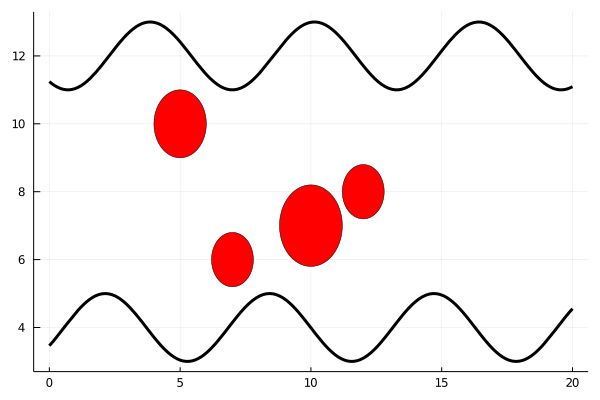

In [4]:
gr()

draw_road(road,0,20)

In [5]:
circle = Circle(1,Point(5,10))
test_curve = BezierCurve([Point(2,9),Point(6,11)])
test_curve = BezierCurve([Point(0, 10), Point(9.792786584297819, 12.404595735445575), Point(19, 9)])

3-element Array{Point,1}:
 Point(0, 10)
 Point(9.792786584297819, 12.404595735445575)
 Point(19, 9)

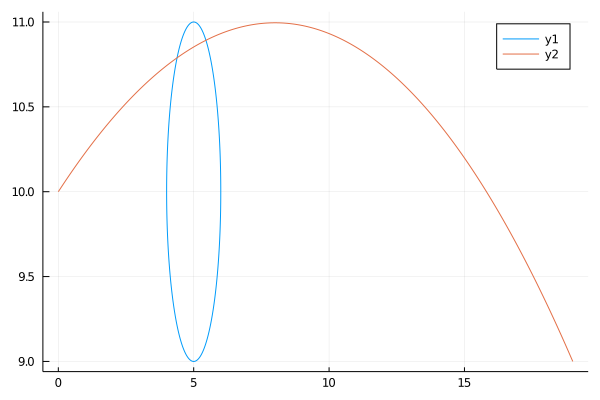

In [6]:
plt = plot(get_circle(circle))
plot!(plt,get_curve(test_curve))

In [7]:
curve_values = get_curve(test_curve)
i = findall(x -> x==4,curve_values[1])
@show i
curve_values[2][i]

i = Int64[]


Any[]

In [8]:
circle_values = get_circle(circle)
is = findall(x -> round(x,digits=2) == 4.00,circle_values[1])
# filter(x -> x<4.1,circle_values[1])

16-element Array{Int64,1}:
 243
 244
 245
 246
 247
 248
 249
 250
 251
 252
 253
 254
 255
 256
 257
 258

In [9]:
circ_intersects = []
for i in is
    if round(circle_values[2][i],digits=1) == curve_values[2][251]
        append!(circ_intersects,[i])
    end
end
circ_intersects

Any[]

In [10]:
intersects = []
for i in 1:length(curve_values[1])
    x = curve_values[1][i]
    y = curve_values[2][i]
    potential_intersect_circle_is = findall(cx -> round(cx,digits=1)==round(x,digits=1),circle_values[1])
    for j in potential_intersect_circle_is
        if round(y,digits=1) == round(circle_values[2][j],digits=1)
            append!(intersects,[(x,y)])
        end
    end
end
@show intersects

infeasbile_d = √((intersects[1][1]-intersects[end][1])^2 + (intersects[1][2] - intersects[end][2])^2)


intersects = Any[(4.280484355731011, 10.776857256404922), (4.280484355731011, 10.776857256404922), (4.319137855387164, 10.781340314086437), (4.319137855387164, 10.781340314086437), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.357786670457968, 10.785776898236183), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.396430800943424, 10.790167008854164), (4.43507024684353, 10.794510645940377), (4.43507024684353, 10.794510645940377), (

1.2404460658997665

In [11]:
include("GA.jl")
include("roadNetwork.jl")
include("plottingUtils.jl")
P = GA(start_point,goal_point,road,2);

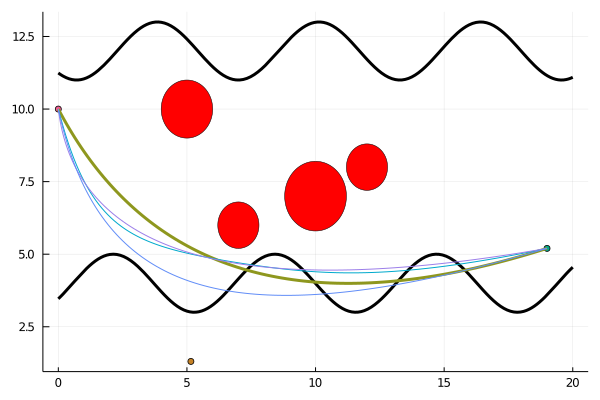

In [12]:
plotGeneration!(draw_road(road,0,20),P[1:4],road)

# map(i->isFeasible(road,i),P)

In [13]:
map(i -> feasibilityCheck(road,i),P)
# feasibilityCheck(road,P[1])

LoadError: MethodError: Cannot `convert` an object of type Nothing to an object of type Bool
Closest candidates are:
  convert(::Type{IT}, !Matched::GeometryBasics.OffsetInteger) where IT<:Integer at /home/sam/.julia/packages/GeometryBasics/csguK/src/offsetintegers.jl:40
  convert(::Type{T}, !Matched::T) where T<:Number at number.jl:6
  convert(::Type{T}, !Matched::Number) where T<:Number at number.jl:7
  ...

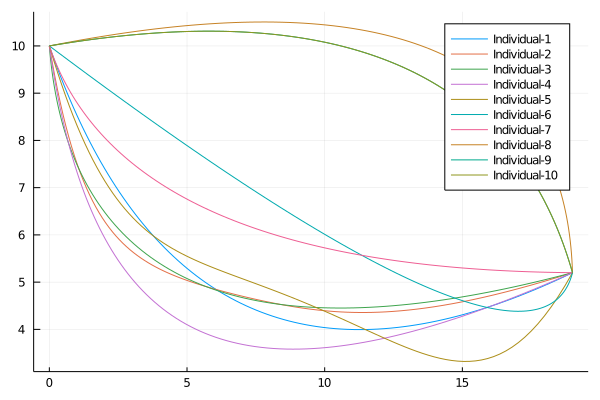

4-element Array{Tuple{Array{Any,1},Array{Any,1}},1}:
 ([6.0, 5.999920727434814, 5.999682922307536, 5.99928662232101, 5.99873189030667, 5.998018814214575, 5.997147507099467, 5.996118107102847, 5.99493077743107, 5.993585706329474  …  5.993585706329474, 5.99493077743107, 5.996118107102847, 5.997147507099467, 5.998018814214575, 5.99873189030667, 5.99928662232101, 5.999682922307536, 5.999920727434814, 6.0], [10.0, 10.012591220998457, 10.025180445720139, 10.03776567820477, 10.050344923125028, 10.062916186102886, 10.075477474025815, 10.088026795362785, 10.100562160480008, 10.113081581956386  …  9.886918418043612, 9.899437839519992, 9.911973204637214, 9.924522525974185, 9.937083813897114, 9.94965507687497, 9.96223432179523, 9.974819554279861, 9.987408779001543, 10.0])
 ([11.2, 11.199904872921778, 11.199619506769043, 11.199143946785213, 11.198478268368005, 11.19762257705749, 11.19657700851936, 11.195341728523417, 11.193916932917285, 11.19230284759537  …  11.19230284759537, 11.193916932917285, 1

In [14]:
plt = plotGeneration(P)
o_vals = map(o -> get_circle(o), road.obstacles)


In [15]:
function plotObstacles(road)
    plt = plot()
    for o in road.obstacles
        plot!(plt,get_circle(o), seriestype=[:shape],legend=false )
    end
    plt
end

plotObstacles (generic function with 1 method)

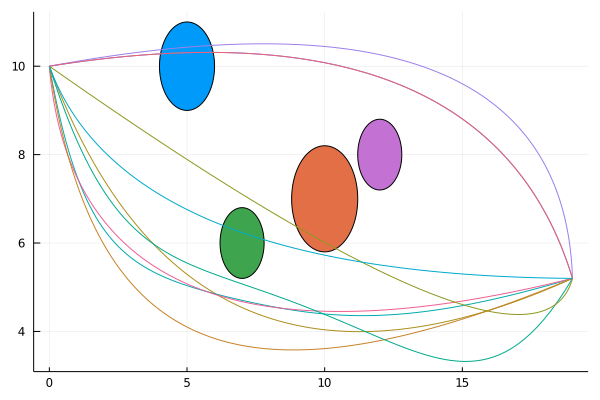

In [16]:
include("plottingUtils.jl")
plt =plotObstacles(road)
plotGeneration!(plt,P)